In [14]:
from collections import Counter
import re
import pandas as pd
import numpy as np
import time
import os
import seaborn as sns
from matplotlib import pyplot as plt

In [15]:
fld = r'D:\Teller_Finance\nansen_wallet_profiler\first_batch_200_6_1_2021'
df = pd.DataFrame()
fls = os.listdir(fld)
for fl in fls:
    f = fld + '\\' + fl
    df = df.append(pd.read_parquet(f))

In [16]:
fld = r'D:\Teller_Finance\nansen_wallet_profiler\second_batch_300_6_2_2021'
fls = os.listdir(fld)
for fl in fls:
    f = fld + '\\' + fl
    df = df.append(pd.read_parquet(f))

In [17]:
fld = r'D:\Teller_Finance\nansen_wallet_profiler\third_batch_300_6_2_2021'
fls = os.listdir(fld)
for fl in fls:
    f = fld + '\\' + fl
    df = df.append(pd.read_parquet(f))

In [18]:
df.shape

(795, 3)

In [5]:
profiles=[]
dic = {}
pfl = []
for ix,ff in enumerate(df['raw_string'].values):
    ls = ff.split('\n')
    for cc in ls:
        if '.' not in cc and 'Labels for Address' not in cc:
            profiles.append(cc)
            pfl.append(cc)
        if 'AdeptCamp' in cc:
            print(cc)
            print(df['address'].iloc[ix])
            
    ky = df['address'].iloc[ix]
    dic[ky]=profiles
    profiles = []


@AdeptCamp
0x069e85d4f1010dd961897dc8c095fbb5ff297434


In [6]:
cnt = Counter(pfl).most_common(50)    

In [7]:
lbl = [kk[0] for kk in cnt][0:50]
ct = [kk[1] for kk in cnt][0:50]

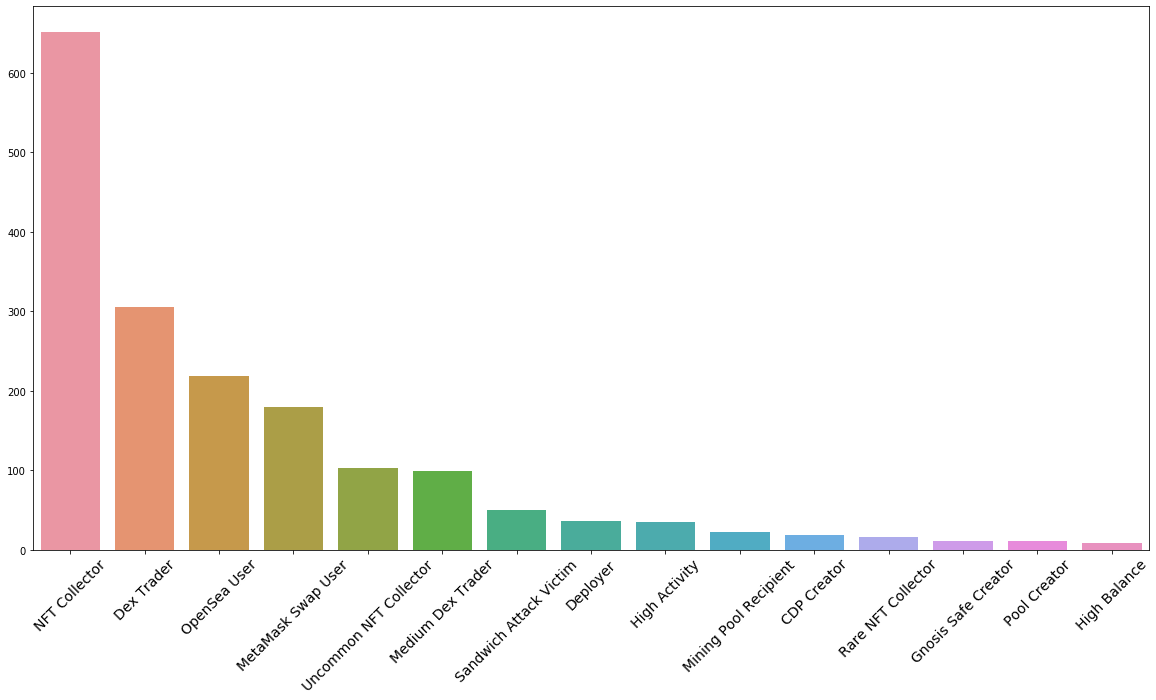

In [8]:
fig = plt.figure(figsize = [20,10])
sns.barplot(x=lbl[0:15],y=ct[0:15] )
plt.xticks(rotation=45,size = 14)

plt.show()


In [9]:
a = []
for ll in dic.values():
    a.extend(ll)
cols_m_wallet = list(set(a)) # create columns
cols = ['wallet_address'] + cols_m_wallet
dfp = pd.DataFrame(columns = cols)
tmp= []
for cc in dic:
    tm = [cc]
    #tm.extend(dic[cc])
    res = [1 if ll in dic[cc] else 0 for ll in cols_m_wallet]
    tm.extend(res)
    tmp.append(tm)

dfp = pd.DataFrame(tmp,columns = cols)


In [10]:
msk=dfp.columns.isin(['wallet_address'])
f=dfp[dfp.columns[~msk]].sum() > 5
cls = dfp.columns[~msk][f.values]
df_fin = dfp[ ['wallet_address'] + list(cls.values)]

In [11]:
fl='covalent_balance_snapshot_as_of_5_28.gzip'
df_res=pd.read_parquet(fl)

df_dollar_balance=pd.DataFrame()
df_dollar_balance['address'] = np.nan
df_dollar_balance['quote_currency']  =np.nan
df_dollar_balance['balance'] = np.nan
for ll in range(df_res.shape[0]):
    address = df_res['address'].iloc[ll]
    quote_currency =df_res['quote_currency'].iloc[ll]
    balance = []
    for cc in df_res['items'].iloc[ll]:
        balance.append( int(cc['quote']))
    dollar_balance = sum(balance)
    df_dollar_balance.loc[ll] = [address,quote_currency,dollar_balance]

In [12]:
dfm=df_fin.merge(df_dollar_balance, how = 'left', left_on='wallet_address', right_on = 'address')


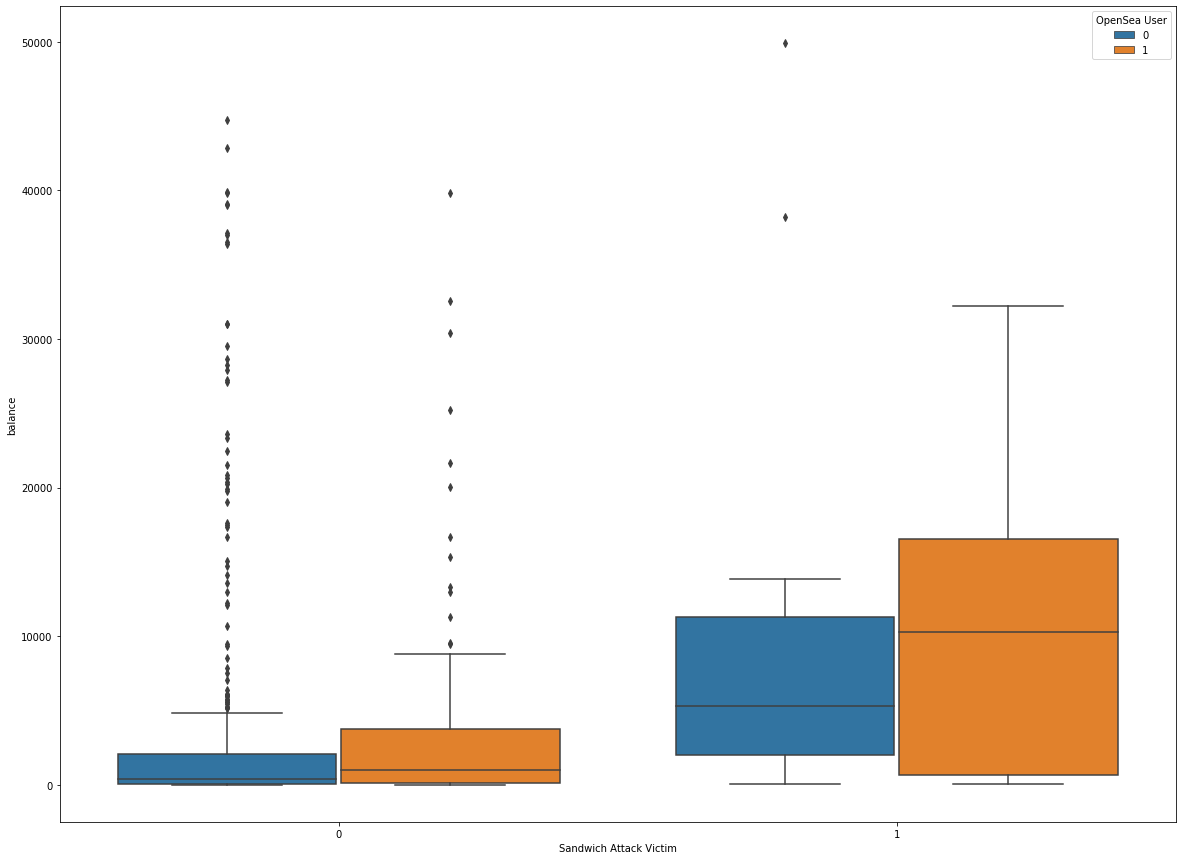

In [38]:
plt.figure(figsize= [20,15])
sns.boxplot(y='balance',x='Sandwich Attack Victim',hue='OpenSea User',   data=dfm[dfm['balance']<50000])
plt.show()
#dfm[dfm['Rare NFT Collector']==1]
#dfm[dfm['Rare NFT Collector']==0]